# Heart Attack Analysis & Prediction
<img src="https://clipart-library.com/img/1095592.jpg" width="400" height="100">

# Objective:
The primary objective of the Heart Attack Analysis & Prediction project is to develop a robust and accurate machine learning model that can analyze and predict the likelihood of a heart attack based on the medical history of patients. The goal is to leverage advanced data analytics and predictive modeling techniques to improve the early detection of individuals at risk of experiencing a heart attack.<br>
The specific objectives include:<br>
1. Data Collection, Exploration and Preprocessing.
2. Exploratory Data Analysis.
3. Feature Selection and Engineering.
4. Machine Learning Model Development.
5. Model Evaluation and Optimization.

# About this dataset:
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
#importin neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1- Data Collection, Exploration and Preprocessing

In [2]:
data = pd.read_csv('heart_data.csv')
df = data.copy()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#checking missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
#checking duplicate records
df.duplicated().sum()

1

In [7]:
df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
#descriptive summary of data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 2- Exploratory Data Analysis

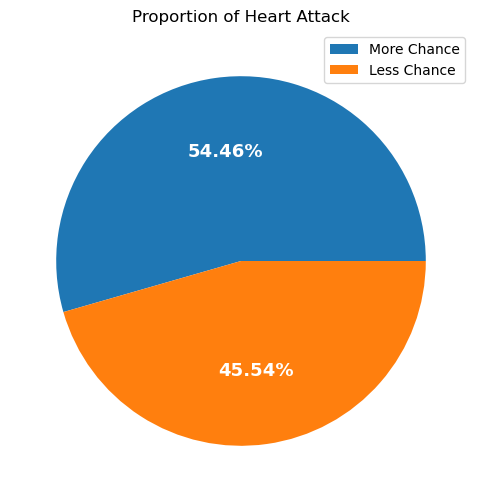

In [9]:
#proportion of heart attack
proportion = df["output"].value_counts(normalize = True)*100
plt.figure(figsize=(6,6))
plt.title("Proportion of Heart Attack")
plt.pie(proportion,
       labels= ['More Chance',"Less Chance"], autopct='%.2f%%',
       textprops = {'size':'13','fontweight':'bold','color':'w'})
plt.legend(loc ="upper right")
plt.show()

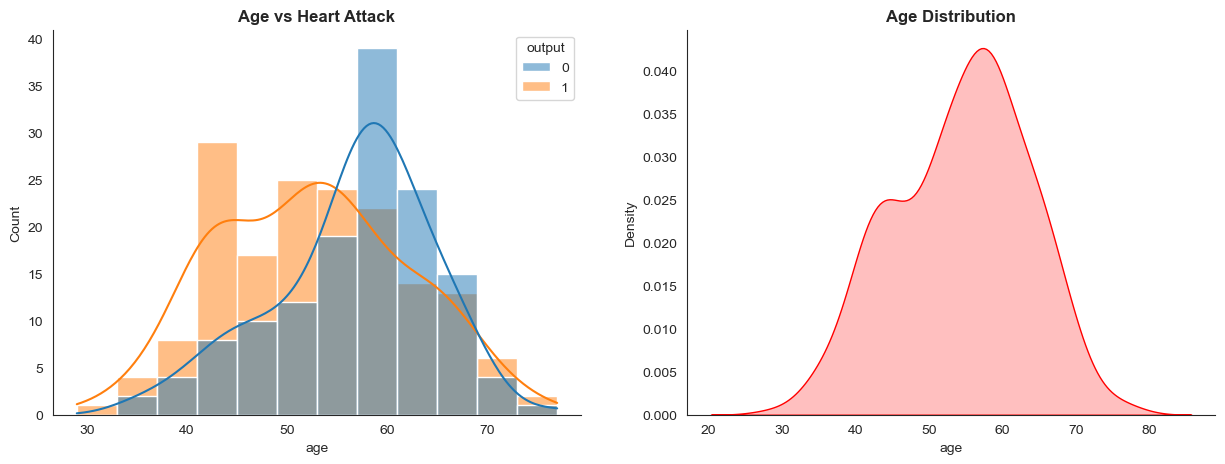

In [10]:
# Distribution of Age and which age group mostly have chances of heartattack
sns.set_style("white")
plt.subplots(1,2,figsize = (15,5))

plt.subplot(121)
plt.title("Age vs Heart Attack",fontdict={'fontweight':'bold'})
sns.histplot(x= "age",data = df,hue="output",kde = True)
sns.despine()

plt.subplot(122)
plt.title('Age Distribution',fontdict={'fontweight':'bold'})
sns.kdeplot(data = df, x = "age",fill = True,color = 'red')
plt.show()

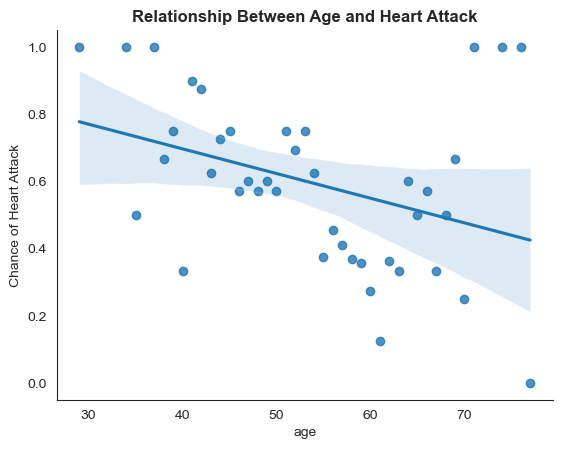

In [11]:
#relationship between Age and Chance of heart attack
age_group = df.groupby('age')["output"].mean()
plt.title("Relationship Between Age and Heart Attack",fontdict={"fontweight":"bold"})
sns.regplot(x=age_group.index, y=age_group)
plt.ylabel("Chance of Heart Attack")
sns.despine()
plt.show()

#### Conclusion:
1. Chances of heart attack is more to the most of the people of age group of 40 to 60.
2. Chances of heart attack is less to the older people as shown in above figures. 

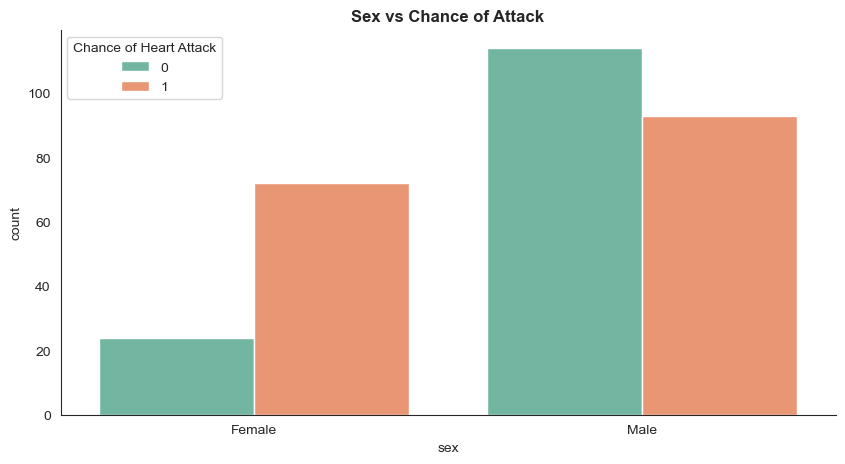

In [12]:
#relation of sex and chance of heart attack
plt.figure(figsize=(10,5))
plt.title("Sex vs Chance of Attack",fontdict={"fontweight":"bold"})
sns.countplot(data = df,hue="output",x='sex',palette="Set2")
plt.legend(title="Chance of Heart Attack",loc="upper left")
plt.xticks([0,1],["Female","Male"])
sns.despine()
plt.show()

#### Conclusion:
1. Most of the men have less chance of Heart Attack as compare to women.
2. However some of the men and most of the women have more chances of heart attack.


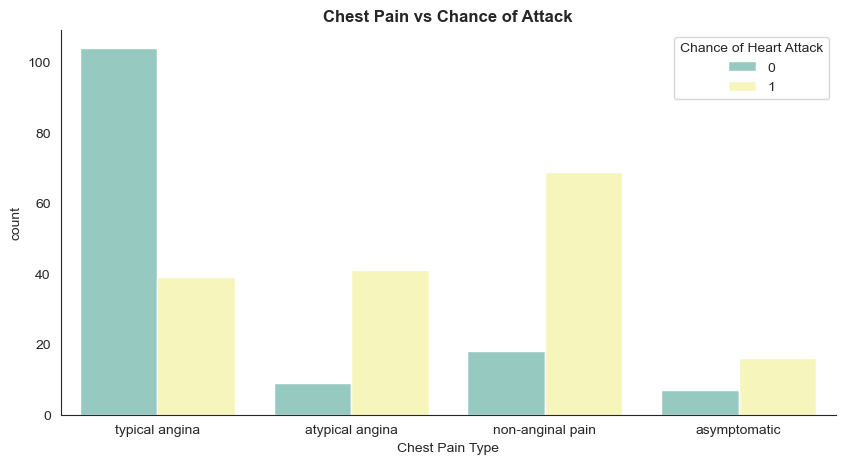

In [13]:
#relation of Chest pain Type and chance of heart attack
plt.figure(figsize=(10,5))
plt.title("Chest Pain vs Chance of Attack",fontdict={"fontweight":"bold"})
sns.countplot(data = df,x="cp",hue='output',palette='Set3') # Value 0: typical angina, Value 1: atypical angina, 
plt.legend(title= "Chance of Heart Attack",loc="upper right") # Value 2: non-anginal pain, Value 3: asymptomatic
plt.xlabel("Chest Pain Type")
plt.xticks([0, 1, 2, 3], ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"])
sns.despine()
plt.show()

#### Coclusion:
From above chart, we can observe that-
1. People with typical angina chest pain have very less chance heart of attack.
2. People with non-anginal chest pain have more chance heart of attack.

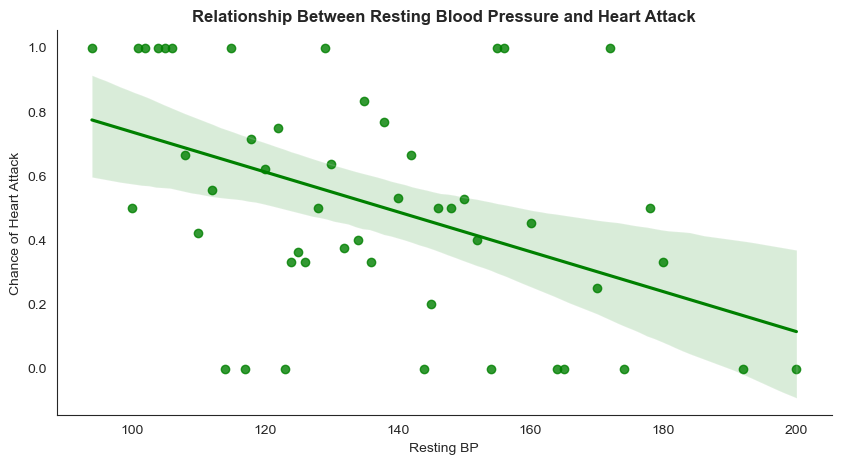

In [14]:
#relationship between Resting Blood Pressure and Chance of heart attack
plt.figure(figsize=(10,5))
group = df.groupby('trtbps')["output"].mean()
plt.title("Relationship Between Resting Blood Pressure and Heart Attack",fontdict={"fontweight":"bold"})
sns.regplot(x=group.index, y=group,color = 'green')
plt.ylabel("Chance of Heart Attack")
plt.xlabel("Resting BP")
sns.despine()
plt.show()

#### Conclusion:
The researchers found that among those with resting blood pressure less than 130, a diastolic blood pressure of less than 60 mm Hg was linked to more heart attacks and strokes. 
In Above figure, it was clearly seen that people who has less resting blood pressure has more chances of heart attack.


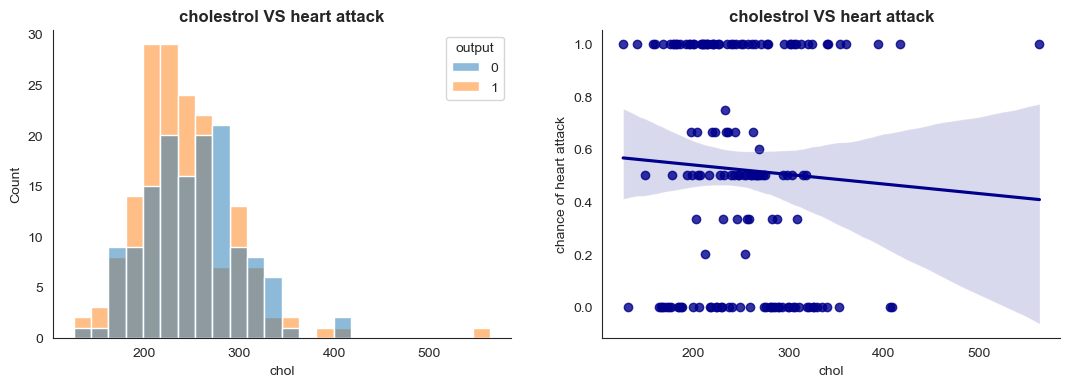

In [15]:
#relationship between cholestrol and heart attack
plt.subplots(1,2,figsize=(13,4))

plt.subplot(121)
plt.title("cholestrol VS heart attack",fontdict={"fontweight":"bold"})
sns.histplot(data =df,x="chol",hue="output")

plt.subplot(122)
cholestrol = df.groupby("chol")["output"].mean()
plt.title("cholestrol VS heart attack",fontdict={"fontweight":"bold"})
sns.regplot(x=cholestrol.index,y=cholestrol,color="darkblue")
plt.ylabel("chance of heart attack")
sns.despine()
plt.show()

#### Conclusion:
People with cholestrol between 200 to 260 has more chances of heart attack.



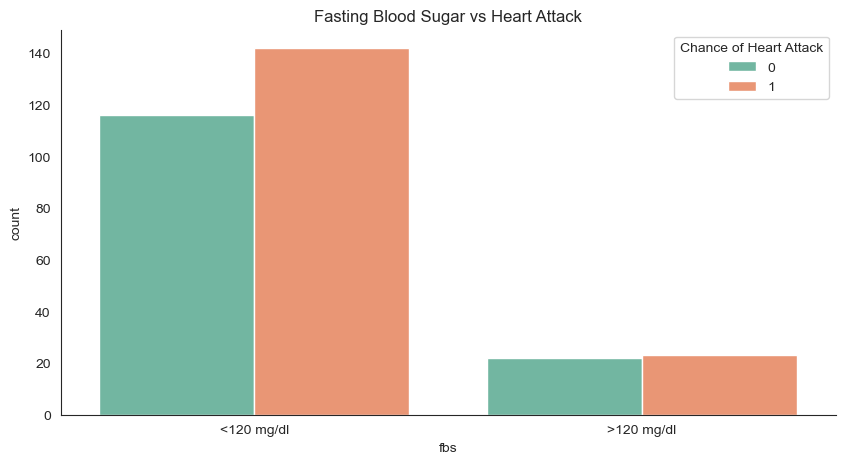

In [16]:
#relationship of fasting blood sugar and chance of heart attack
plt.figure(figsize=(10,5))
plt.title("Fasting Blood Sugar vs Heart Attack")
sns.countplot(data = df,x="fbs",hue="output",palette="Set2")
plt.xticks([0,1],["<120 mg/dl",">120 mg/dl"])
plt.legend(title="Chance of Heart Attack")
sns.despine()
plt.show()

#### Conclusion:
1. People who have fasting blood sugar less than 120 mg/dl ha smore chances of heart attack.
2. While people who have FBS more than 120 mg/dl may or may not have chance of heart attack.

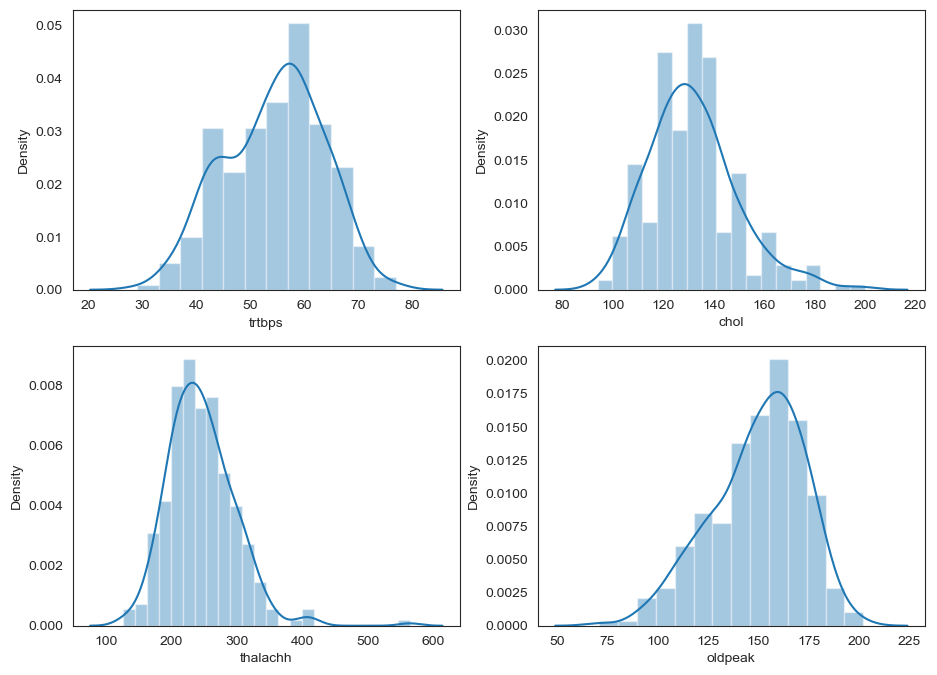

In [17]:
#to explore distribution of data
feature = []
j=1
for i in df.columns:
    if len(df[i].unique())>5:
        feature.append(i)

plt.subplots(2,2,figsize=(11,8))
while(j<5):
    plt.subplot(int("22"+str(j)))
    sns.distplot(x=df[feature[j-1]])
    plt.xlabel(feature[j])
    j+=1


## 3- Feature Selection and Engineering

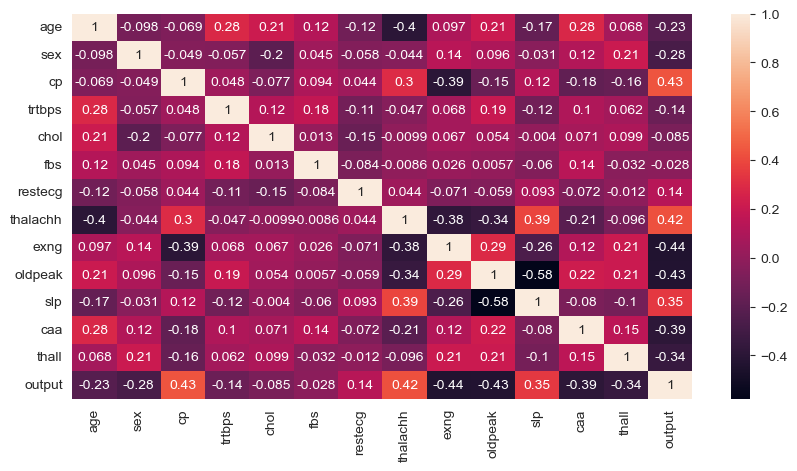

In [18]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
# with the following function we can select highly correlated features and remove it
# to remove multicollinerity and select features-
def correlation(dataset,threshold):
    corr_col = set() #set of all correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name = corr_matrix.columns[i]    #getting name of column
                corr_col.add(col_name)
    return corr_col

corr_features = correlation(df,0.7) # let threshold is 0.7, means features more than ".7" correlation will be removed 
corr_features

set()

#### Conclusion:
There are no highly correlated columns so we can move on with dataset.

## 4- Machine Learning Model Development

In [20]:
#importing neccessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [21]:
# dependent and indpendent features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
# train and test data splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.70,random_state=41)
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (90, 13)
Shape of x_test is (213, 13)
Shape of y_train is (90,)
Shape of y_test is (213,)


In [23]:
#standardizing the data to scale down its values
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
#model training
def modelevaluation(x_train_scaled,y_train,x_test_scaled,y_test):
    models = {"LR":LogisticRegression(),"DT":DecisionTreeClassifier(),
              "KNN":KNeighborsClassifier(),"RF":RandomForestClassifier(),}
    for i in models.keys():
        classifier = models[i]
        classifier.fit(x_train_scaled,y_train)
        y_pred = classifier.predict(x_test_scaled)
        print('_'*50)
        print(models[i])
        print("Accuracy Score is:",accuracy_score(y_pred,y_test))
        print(confusion_matrix(y_pred,y_test))
        print(classification_report(y_pred,y_test))


In [25]:
modelevaluation(x_train_scaled,y_train,x_test_scaled,y_test)

__________________________________________________
LogisticRegression()
Accuracy Score is: 0.784037558685446
[[68 15]
 [31 99]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        83
           1       0.87      0.76      0.81       130

    accuracy                           0.78       213
   macro avg       0.78      0.79      0.78       213
weighted avg       0.80      0.78      0.79       213

__________________________________________________
DecisionTreeClassifier()
Accuracy Score is: 0.7511737089201878
[[81 35]
 [18 79]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       116
           1       0.69      0.81      0.75        97

    accuracy                           0.75       213
   macro avg       0.76      0.76      0.75       213
weighted avg       0.76      0.75      0.75       213

__________________________________________________
KNeighborsClassifier()
Accuracy Sc

#### Conclusion:
Random Forest Classifier performs better than other models.

## 5- Model Evaluation and Optimization

In [44]:
#hyperparameter tuning
parameters = {"criterion":["gini", "entropy", "log_loss"],
             "max_depth":[1,2,3,4,5],
             "max_features":["sqrt", "log2", None]}
gcv = GridSearchCV(RandomForestClassifier(),param_grid=parameters,scoring="accuracy")
gcv.fit(x_train_scaled,y_train)
gcv.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'}

In [50]:
#model development with best parameters
model = RandomForestClassifier(criterion="gini",max_depth=4,max_features="sqrt")
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
print(accuracy_score(y_pred,y_test))

0.8403755868544601


## Exporting models using Pickle module

In [51]:
scaler

StandardScaler()

In [52]:
model

RandomForestClassifier(max_depth=4)

In [53]:
import pickle
f = open("scaler_model",'wb')
pickle.dump(scaler,f)
f.close()
f = open("rf_model","wb")
pickle.dump(model,f)
f.close()